In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
ampep = pd.read_excel("/content/drive/MyDrive/Proyectos/Colaboraciones/RiPPs Classification/Base de datos-RiPPs-AMP.xlsx", sheet_name='AmPEP(222)', header=1)
macrel = pd.read_excel("/content/drive/MyDrive/Proyectos/Colaboraciones/RiPPs Classification/Base de datos-RiPPs-AMP.xlsx", sheet_name='Macrel (233)', header=1)
campr3 = pd.read_excel("/content/drive/MyDrive/Proyectos/Colaboraciones/RiPPs Classification/Base de datos-RiPPs-AMP.xlsx", sheet_name='CAMPR3 (192)', header=1)
ampscanner = pd.read_excel("/content/drive/MyDrive/Proyectos/Colaboraciones/RiPPs Classification/Base de datos-RiPPs-AMP.xlsx", sheet_name='AMP Scanner (85)', header=1)
al4amp = pd.read_excel("/content/drive/MyDrive/Proyectos/Colaboraciones/RiPPs Classification/Base de datos-RiPPs-AMP.xlsx", sheet_name='AL4AMP (204)', header=1)
ampep.head()

,Main product,FASTA del peptido precursor,Actividad antimicrobiana (Experimental),AmPEP,0.3,coincidencia,0.35,coincidencia.1,0.4,coincidencia.2,...,0.9.1,0.85.1,0.8.1,0.75.1,0.7.1,0.65.1,0.6.2,0.55.2,0.5.2,0.45.2
0,bottromycin A2,>bottromycin A2 MGPVVVFDC,True,0.63,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,bottromycin D1,>bottromycin D1 MGPAVVFDC,True,0.63,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,anacyclamide A10,>anacyclamide A10 TSQIWGSPVP,False,0.40,True,False,True,False,True,False,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,microcyclamide,>microcyclamide HCATIC,False,0.40,True,False,True,False,True,False,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,patellamide A,>patellamide A ITVCISVC,False,0.28,False,True,False,True,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [13]:
results = [macrel, campr3, ampscanner, ampep, al4amp]

In [21]:
final_results = []
for df in results:
  df = df[df.columns[:4]]
  df.columns = ["Main Product", "FASTA", "True Label", "Score"]
  final_results.append(df)

Para evaluar el desempeño del modelo a diferentes puntos de corte (probabilidades), lo podemos hacer a través de dos curvas distintas:

*   Receiver Operating Characteristic (ROC) Curve, graficando True Positive Rate vs False Positive Rate.
*   Precision-Recall Curve, graficando Precision vs Recall

Mientras más cercana a 1 sea el area bajo estas cruvas, mejor será el modelo para discriminar entre dos clases. Y además, dependiendo de lo que sea más importante para nuestro estudio, podemos escoger un punto de corte adecuado.



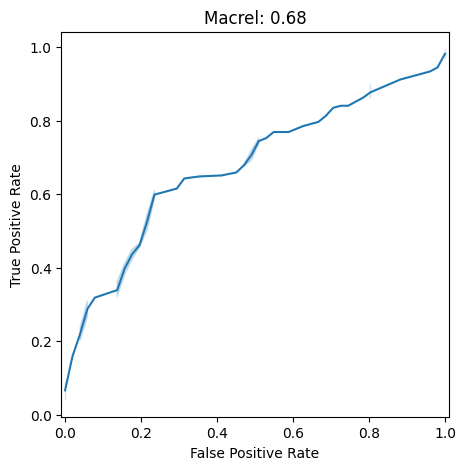

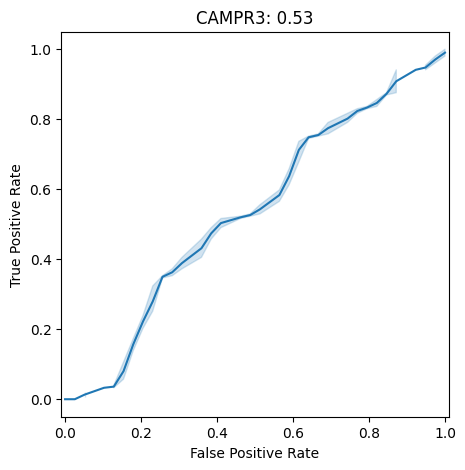

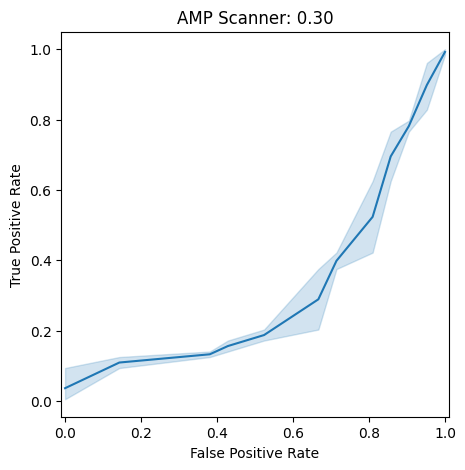

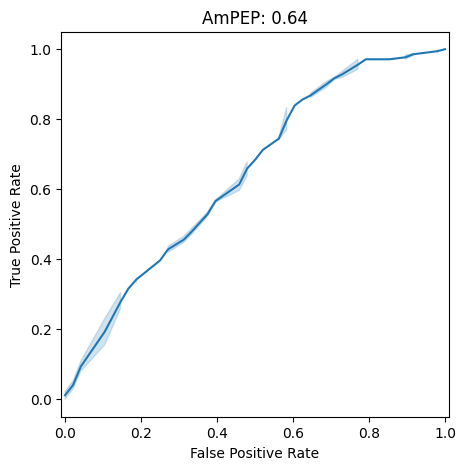

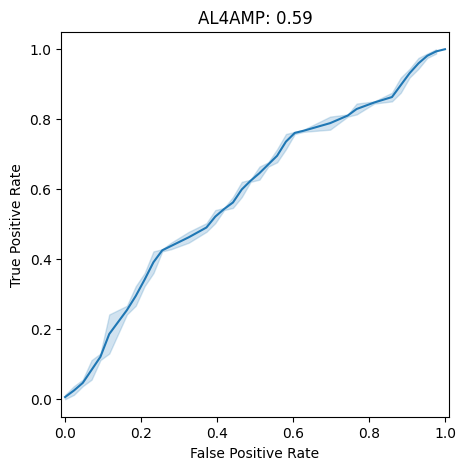

In [29]:
# ROC Curve
# Esto nos devolvera los valores de TPR y FPR a diferentes puntos de corte (thresholds)
for name, df in zip(["Macrel", "CAMPR3", "AMP Scanner", "AmPEP", "AL4AMP"], final_results):
  fpr, tpr, thresholds = roc_curve(df['True Label'], df["Score"], pos_label=1)
  roc_auc = auc(fpr,tpr)
  plt.figure(figsize=(5,5))
  plt.title("{}: {:.2f}".format(name, roc_auc))
  sns.lineplot(x=fpr, y=tpr)
  plt.xlim(-0.01,1.01)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()

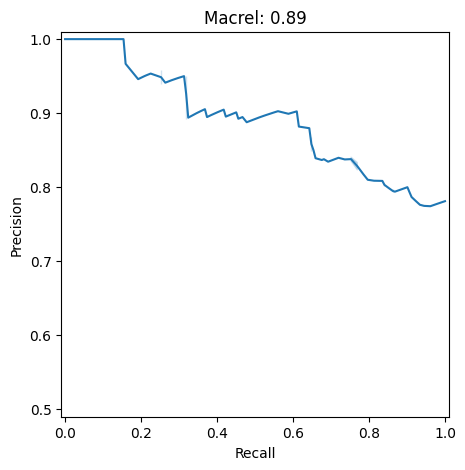

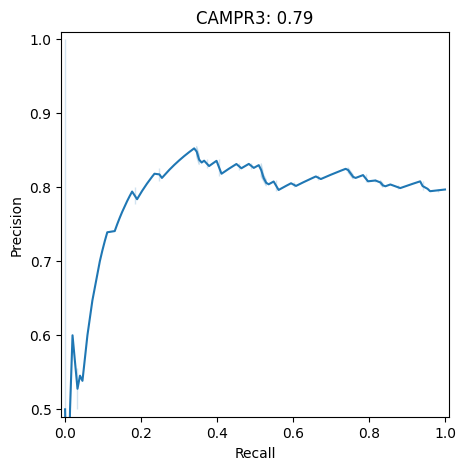

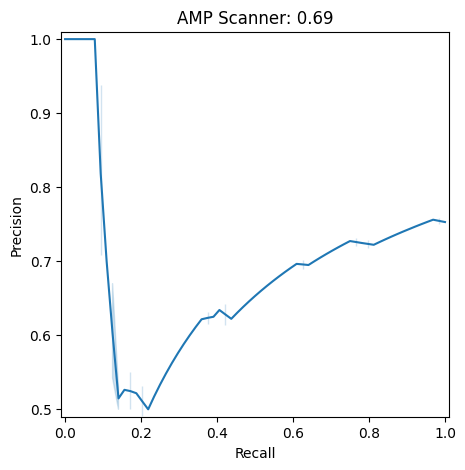

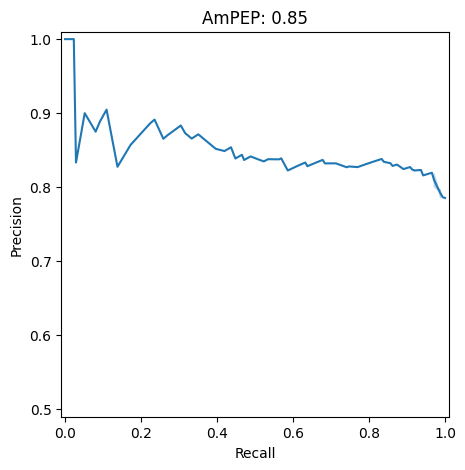

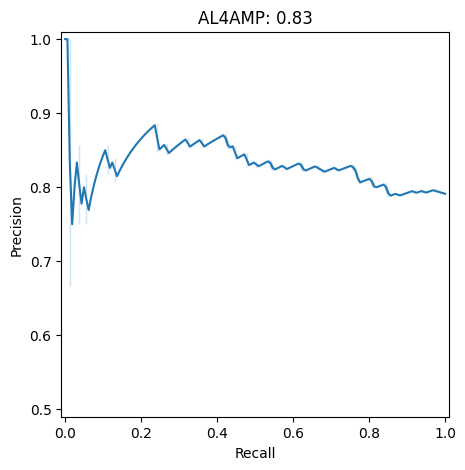

In [33]:
# Podemos hacer lo mismo para la Precision-Recal Curve
for name, df in zip(["Macrel", "CAMPR3", "AMP Scanner", "AmPEP", "AL4AMP"], final_results):
  precision, recall, thresholds = precision_recall_curve(df['True Label'], df["Score"], pos_label=1)
  pr_auc = auc(recall, precision)
  plt.figure(figsize=(5,5))
  plt.title("{}: {:.2f}".format(name, pr_auc))
  sns.lineplot(x=recall, y=precision)
  plt.xlim(-0.01,1.01)
  plt.ylim(0.49,1.01)
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.show()


In [ ]:
PR_data = pd.DataFrame({"Thresholds":np.append(thresholds, [1.0]), "Precision":precision, "Recall":recall})

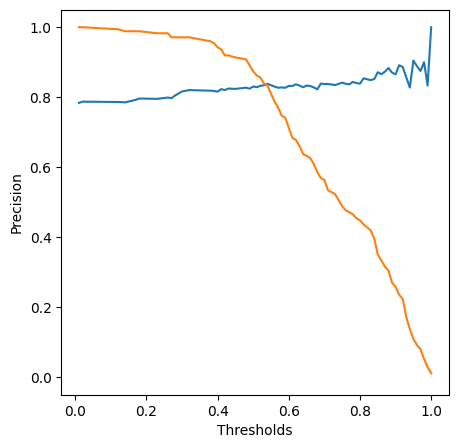

In [ ]:
plt.figure(figsize=(5,5))
sns.lineplot(x="Thresholds", y="Precision", data=PR_data)
sns.lineplot(x="Thresholds", y="Recall", data=PR_data)
plt.show()

In [ ]:
for index, row in test_set.iterrows():
  row["GRAPH_P"].y = torch.tensor([row["pK"]], dtype=torch.long)

NameError: ignored

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr([0,1,2], [1,2,3])[0]

0.9999999999999998